In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
data_dir  = '../dataset/fer2013plus/train'

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

In [3]:
emotion_counts = {label: 0 for label in labels}

for label in labels:
    label_dir = os.path.join(data_dir, label)
    num_images = len(os.listdir(label_dir))
    emotion_counts[label] = num_images

In [4]:
print (emotion_counts)

{'anger': 2466, 'contempt': 165, 'disgust': 191, 'fear': 652, 'happiness': 7528, 'neutral': 10308, 'sadness': 3514, 'surprise': 3562}


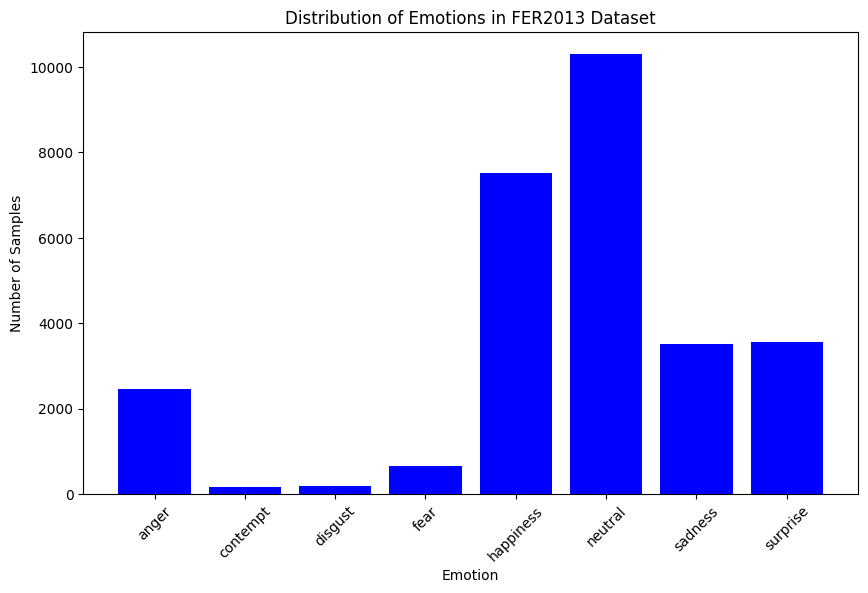

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='blue')
plt.title('Distribution of Emotions in FER2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [6]:
import numpy as np
import os
import cv2
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances

# Load images and labels from directories
data_dir = "../dataset/fer2013plus/train"
emotions = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
X = []
y = []

# Iterate through directories for each emotion
for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(data_dir, emotion)
    for img_name in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_name)
        # Read image and convert to grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        # Resize image to a fixed size if necessary
        # img = cv2.resize(img, (width, height))
        # Flatten image pixel values and append to X
        X.append(img.flatten())
        # Append emotion label to y
        y.append(i)  # Using the index as label

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Initialize Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=2)  # Considering only the nearest neighbor

# Fit the model
nn_model.fit(X)

# Compute pairwise distances between samples
distances = pairwise_distances(X)

# Initialize lists to store intra-class and extra-class distances
intra_class_distances = []
extra_class_distances = []

# Iterate through each sample in the dataset
for i in range(len(X)):
    # Get label of current sample
    label = y[i]
    
    # Find the indices of samples with the same label
    same_class_indices = np.where(y == label)[0]
    
    # Find the indices of samples with different labels
    different_class_indices = np.where(y != label)[0]
    
    # Compute distances to nearest neighbors from the same class
    same_class_distances = distances[i, same_class_indices]
    # Exclude the distance to itself (always 0)
    same_class_distances = same_class_distances[same_class_distances != 0]
    # Append the minimum distance to intra_class_distances
    intra_class_distances.append(np.min(same_class_distances))
    
    # Compute distances to nearest neighbors from a different class
    different_class_distances = distances[i, different_class_indices]
    # Append the minimum distance to extra_class_distances
    extra_class_distances.append(np.min(different_class_distances))

# Convert lists to NumPy arrays
intra_class_distances = np.array(intra_class_distances)
extra_class_distances = np.array(extra_class_distances)

# Calculate N1 metric
intra_extra= np.sum(intra_class_distances) / np.sum(extra_class_distances)
N1 = intra_extra / (1 + intra_extra)

print("N1 metric:", N1)

# # Calculate N2 metric
# N2 = np.sum(y != y[nn_model.kneighbors(X, 2, return_distance=False)[:, 1]]) / len(y)

# print("N1 metric:", N1)
# print("N2 metric:", N2)

# # Calculate F1 metric
# max_fdr = np.max(intra_class_distances / extra_class_distances)
# F1 = 1 / (1 + max_fdr)
# print("F1 metric:", F1)

# # Calculate F2 metric
# max_fdr = np.max(intra_class_distances / extra_class_distances)
# F2 = 1 / (1 + max_fdr**2)
# print("F2 metric:", F2)

N1 metric: 0.4948506934952714


In [7]:
print (emotion_counts)

{'anger': 2466, 'contempt': 165, 'disgust': 191, 'fear': 652, 'happiness': 7528, 'neutral': 10308, 'sadness': 3514, 'surprise': 3562}


In [8]:
for i in emotion_counts:
    cn = emotion_counts['neutral']
    cp = emotion_counts[i]
    ir = cn/cp

    Ob = cp * (ir - 1)
    Op = Ob * N1

    print (i + ' initial size : '+ str(emotion_counts[i]))
    print (i + ' oversample size : '+ str(Op))
    print (i + ' final size      : '+ str(emotion_counts[i]+Op))
    print (" ")

anger initial size : 2466
anger oversample size : 3880.619138389918
anger final size      : 6346.619138389919
 
contempt initial size : 165
contempt oversample size : 5019.270584122538
contempt final size      : 5184.270584122538
 
disgust initial size : 191
disgust oversample size : 5006.404466091661
disgust final size      : 5197.404466091661
 
fear initial size : 652
fear oversample size : 4778.27829639034
fear final size      : 5430.27829639034
 
happiness initial size : 7528
happiness oversample size : 1375.6849279168543
happiness final size      : 8903.684927916855
 
neutral initial size : 10308
neutral oversample size : 0.0
neutral final size      : 10308.0
 
sadness initial size : 3514
sadness oversample size : 3362.015611606874
sadness final size      : 6876.015611606874
 
surprise initial size : 3562
surprise oversample size : 3338.2627783191
surprise final size      : 6900.2627783191
 


{'anger': 6347, 'contempt': 5185, 'disgust': 5198, 'fear': 5431, 'happiness': 8904, 'neutral': 10308, 'sadness': 6876, 'surprise': 6901}


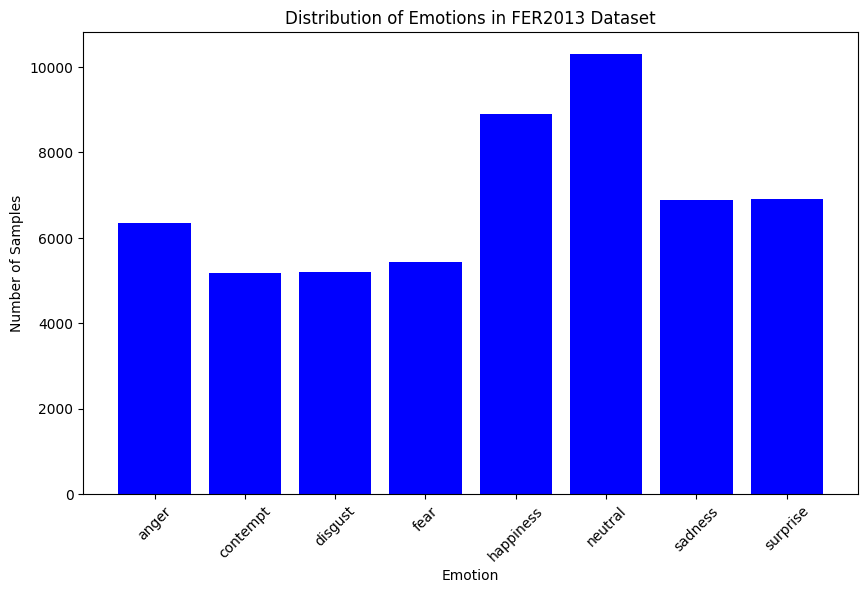

In [13]:
augmented_dir  = '../dataset/augmented'

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

augmented_emotion_counts = {label: 0 for label in labels}

for label in labels:
    label_dir = os.path.join(augmented_dir, label)
    augmented_num_images = len(os.listdir(label_dir))
    augmented_emotion_counts[label] = augmented_num_images

print (augmented_emotion_counts)

plt.figure(figsize=(10, 6))
plt.bar(augmented_emotion_counts.keys(), augmented_emotion_counts.values(), color='blue')
plt.title('Distribution of Emotions in FER2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [10]:
augmented_emotion_counts_divided = {}  # Define the dictionary before using it

# Divide each emotion counts by 4
for i in augmented_emotion_counts:
    augmented_emotion_counts_divided[i] = augmented_emotion_counts[i] / 4
    print(i + ' : ' + str(augmented_emotion_counts_divided[i]))

anger : 1586.75
contempt : 1296.0
disgust : 1299.5
fear : 1357.75
happiness : 2226.0
neutral : 2577.0
sadness : 1719.0
surprise : 1725.25


{'anger': 7934, 'contempt': 6277, 'disgust': 6498, 'fear': 6789, 'happiness': 11130, 'neutral': 12885, 'sadness': 8393, 'surprise': 8627}


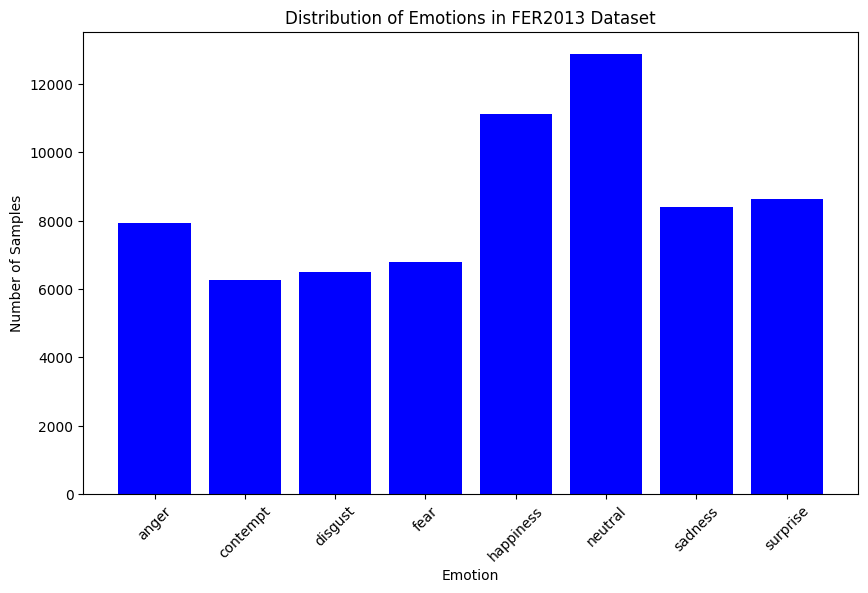

In [11]:
augmented_dir  = '../dataset/augmented_masked'

labels = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
# labels = ['anger','contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

augmented_emotion_counts = {label: 0 for label in labels}

for label in labels:
    label_dir = os.path.join(augmented_dir, label)
    augmented_num_images = len(os.listdir(label_dir))
    augmented_emotion_counts[label] = augmented_num_images

print (augmented_emotion_counts)

plt.figure(figsize=(10, 6))
plt.bar(augmented_emotion_counts.keys(), augmented_emotion_counts.values(), color='blue')
plt.title('Distribution of Emotions in FER2013 Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()